In [1]:
import timeit
import tqdm
import pprint
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'

In [3]:
import pyquaternion # pip install pyquaternion --user
import quaternion # pip install numpy_quaternion --user
import rowan # pip install rowan --user

/home/vramasub/.local/lib/python3.6/site-packages/quaternion/numba_wrapper.py:29: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from either numbapro or numba.
This means that the code will run MUCH more slowly.
You probably REALLY want to install numba / numbapro.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


In [4]:
def arr_to_pyquat(arr):
    if len(arr.shape) > 1:
        pq_arr = np.empty(arr.shape[:-1], dtype='object')
        for i, x in enumerate(arr):
            pq_arr[i] = pyquaternion.Quaternion(x)
    else:
        pq_arr = np.array([pyquaternion.Quaternion(arr)])
    return pq_arr

def arr_to_npquat(arr):
    return quaternion.as_quat_array(arr)

pyquat_times = {}
quat_times = {}
rowan_times = {}
Ns = [10, 100000]
num = 10
pqlim = 1e8

In [5]:
pyquat_times['Multiply'] = []
quat_times['Multiply'] = []
rowan_times['Multiply'] = []
for N in tqdm.tqdm_notebook(Ns):
    x = rowan.random.rand(N)
    y = rowan.random.rand(N)

    if N < pqlim:
        pyquat_times['Multiply'].append(
            timeit.timeit(
                "x*y",
                setup="from __main__ import x, y, arr_to_pyquat; x = arr_to_pyquat(x); y = arr_to_pyquat(y)",
                number = num
            )
        )
    quat_times['Multiply'].append(
        timeit.timeit(
            "x*y",
            setup="from __main__ import x, y, arr_to_npquat; x = arr_to_npquat(x); y = arr_to_npquat(y)",
            number = num
        )
    )
    rowan_times['Multiply'].append(
        timeit.timeit(
            "rowan.multiply(x, y)",
            setup="from __main__ import x, y, rowan",
            number = num
        )
    )

In [6]:
pyquat_times['Exponential'] = []
quat_times['Exponential'] = []
rowan_times['Exponential'] = []
for N in tqdm.tqdm_notebook(Ns):
    x = rowan.random.rand(N)

    if N < pqlim:
        pyquat_times['Exponential'].append(
            timeit.timeit(
                "for i in range(len(x)): pyquaternion.Quaternion.exp(x[i])",
                setup="from __main__ import x, pyquaternion, arr_to_pyquat; x = arr_to_pyquat(x);",
                number = num
            )
        )
    quat_times['Exponential'].append(
        timeit.timeit(
            "np.exp(x)",
            setup="from __main__ import x, arr_to_npquat, np; x = arr_to_npquat(x);",
            number = num
        )
    )
    rowan_times['Exponential'].append(
        timeit.timeit(
            "rowan.exp(x)",
            setup="from __main__ import x, rowan",
            number = num
        )
    )

In [7]:
pyquat_times['Conjugate'] = []
quat_times['Conjugate'] = []
rowan_times['Conjugate'] = []
for N in tqdm.tqdm_notebook(Ns):
    x = rowan.random.rand(N)

    if N < pqlim:
        pyquat_times['Conjugate'].append(
            timeit.timeit(
                "for i in range(len(x)): x.conjugate",
                setup="from __main__ import x, arr_to_pyquat; x = arr_to_pyquat(x);",
                number = num
            )
        )
    quat_times['Conjugate'].append(
        timeit.timeit(
            "x.conjugate()",
            setup="from __main__ import x, arr_to_npquat; x = arr_to_npquat(x);",
            number = num
        )
    )
    rowan_times['Conjugate'].append(
        timeit.timeit(
            "rowan.conjugate(x)",
            setup="from __main__ import x, rowan",
            number = num
        )
    )

In [8]:
pyquat_times['Norm'] = []
quat_times['Norm'] = []
rowan_times['Norm'] = []
for N in tqdm.tqdm_notebook(Ns):
    x = rowan.random.rand(N)

    if N < pqlim:
        pyquat_times['Norm'].append(
            timeit.timeit(
                "for i in range(len(x)): x[i].norm",
                setup="from __main__ import x, arr_to_pyquat; x = arr_to_pyquat(x);",
                number = num
            )
        )
    quat_times['Norm'].append(
        timeit.timeit(
            "np.abs(x)",
            setup="from __main__ import x, np, arr_to_npquat; x = arr_to_npquat(x);",
            number = num
        )
    )
    rowan_times['Norm'].append(
        timeit.timeit(
            "rowan.norm(x)",
            setup="from __main__ import x, rowan",
            number = num
        )
    )

In [9]:
pyquat_times['To Matrix'] = []
quat_times['To Matrix'] = []
rowan_times['To Matrix'] = []
for N in tqdm.tqdm_notebook(Ns):
    x = rowan.random.rand(N)

    if N < pqlim:
        pyquat_times['To Matrix'].append(
            timeit.timeit(
                "for i in range(len(x)): x[i].rotation_matrix",
                setup="from __main__ import x, arr_to_pyquat; x = arr_to_pyquat(x);",
                number = num
            )
        )
    quat_times['To Matrix'].append(
        timeit.timeit(
            "quaternion.as_rotation_matrix(x)",
            setup="from __main__ import x, quaternion, arr_to_npquat; x = arr_to_npquat(x);",
            number = num
        )
    )
    rowan_times['To Matrix'].append(
        timeit.timeit(
            "rowan.to_matrix(x)",
            setup="from __main__ import x, rowan",
            number = num
        )
    )

In [10]:
pyquat_times['N'] = list(np.array(Ns)[np.array(Ns) < pqlim])
quat_times['N'] = Ns
rowan_times['N'] = Ns

In [11]:
df_pq = pd.DataFrame(pyquat_times).melt(id_vars="N", var_name="operation", value_name="pyquaternion")
df_nq = pd.DataFrame(quat_times).melt(id_vars="N", var_name="operation", value_name="npquaternion")
df_r = pd.DataFrame(rowan_times).melt(id_vars="N", var_name="operation", value_name="rowan")
df = df_r.merge(df_nq, on =["N", "operation"])
df = df.merge(df_pq, on =["N", "operation"], how = "left")
df.fillna(0, inplace=True)
df['pyquaternion'] /= df['N']
df['pyquaternion'] *= 1e6
df['npquaternion'] /= df['N']
df['npquaternion'] *= 1e6
df['rowan'] /= df['N']
df['rowan'] *= 1e6

In [12]:
view = df.groupby(["N", "operation"]).mean()
view['rowan vs. npq'] = view['rowan']/view['npquaternion']
view['pyq vs. rowan'] = view['pyquaternion']/view['rowan']
view

rowan  npquaternion  pyquaternion  rowan vs. npq  \
N      operation                                                            
10     Conjugate     14.586421      1.644809      0.947318       8.868156   
       Exponential  127.592287      2.700998    521.440292      47.238934   
       Multiply     143.253407      2.314406    267.919688      61.896391   
       Norm          15.829806      1.184107     39.275899      13.368563   
       To Matrix    196.876097    141.610601    247.702608       1.390264   
100000 Conjugate      0.145949      0.027319      0.492793       5.342298   
       Exponential    1.423592      0.610161    369.216979       2.333142   
       Multiply       0.734740      0.060439    178.193753      12.156796   
       Norm           0.171715      0.030518     12.802495       5.626726   
       To Matrix      0.864446      0.871237    164.930106       0.992206   

                    pyq vs. rowan  
N      operation                   
10     Conjugate         0.064945  
       Exponential       4.086770  
       Multiply          1.870250  
       Norm              2.481136  
       To Matrix         1.258165  
100000 Conjugate         3.376483  
       Exponential     259.355814  
       Multiply        242.526426  
       Norm             74.556451  
       To Matrix       190.792875

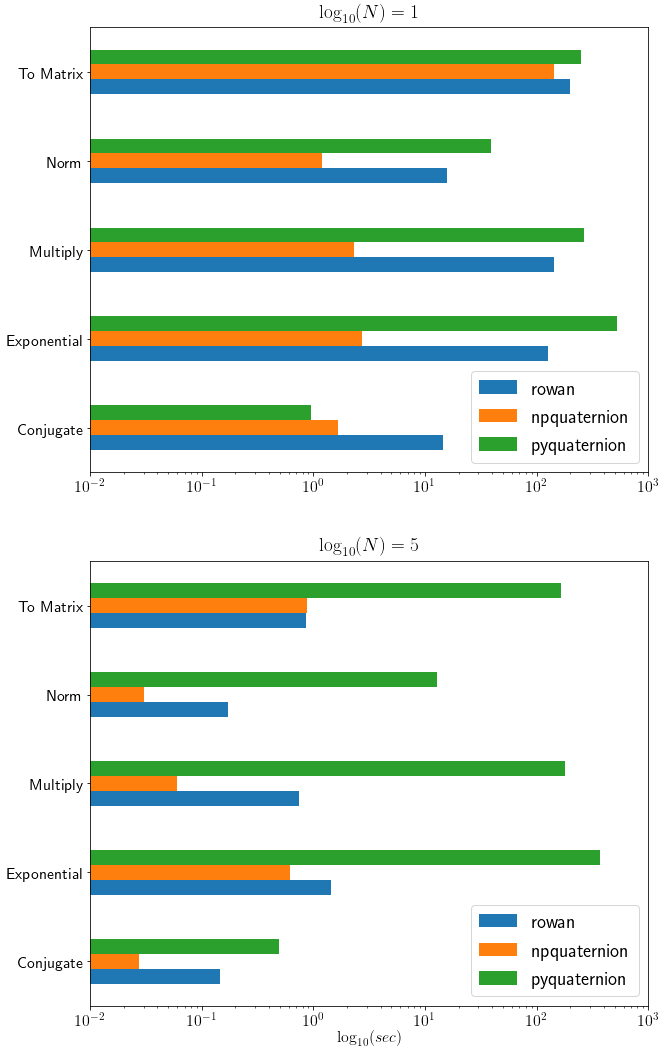

In [21]:
cols = list(col['color'] for col in plt.rcParams['axes.prop_cycle'])
fig, axes = plt.subplots(2, 1, figsize=(10, 18))
ax = df[df['N'] == Ns[0]].drop(['N'], axis=1).groupby(
    ["operation"]).mean().plot.barh(ax=axes[0], logx=True, color = cols[0:3],
                                    title="$\log_{{10}}(N) = {}$".format(int(np.log10(Ns[0]))),
                                    xlim=(10**-2, 10**3), legend=False)
ax = df[df['N'] == Ns[1]].drop(['N'], axis=1).groupby(
    ["operation"]).mean().plot.barh(ax=axes[1], logx=True, color = cols[0:3],
                                    title="$\log_{{10}}(N) = {}$".format(int(np.log10(Ns[1]))),
                                    xlim=(10**-2, 10**3), legend=False)
ax.set_xlabel("$\log_{10}(sec)$")
for ax in axes.flatten():
    ax.set_ylabel("")
    ax.legend(loc='best')
plt.show()
fig.savefig("Performance.png")